,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,1.103579,0.167718,0.349899,1.235066,0.612359,7.482165,4.836787,good,0,7400000
30467,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,0,25000000
30468,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,4.338453,1.339078,1.234235,1.192543,1.186621,13.459593,9.890758,no data,0,6970959
30469,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,0,13500000
30470,30473,43,28.0,1.0,Novogireevo,2215.0,4,5824.0,4,0,...,2.108265,0.825811,0.378950,0.480531,0.867332,0.688707,0.127867,poor,0,5600000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 61 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30471 non-null  int64  
 1   full_sq                                30471 non-null  int64  
 2   life_sq                                24088 non-null  float64
 3   floor                                  30304 non-null  float64
 4   sub_area                               30471 non-null  object 
 5   preschool_quota                        23783 non-null  float64
 6   preschool_education_centers_raion      30471 non-null  int64  
 7   school_quota                           23786 non-null  float64
 8   school_education_centers_raion         30471 non-null  int64  
 9   school_education_centers_top_20_raion  30471 non-null  int64  
 10  hospital_beds_raion                    16030 non-null  float64
 11  he

1.000000    2749
0.500000    1041
0.600000     561
0.666667     466
0.513514     406
            ... 
0.373134       1
1.035714       1
1.282609       1
0.008621       1
0.686047       1
Length: 1557, dtype: int64


<Figure size 800x500 with 0 Axes>

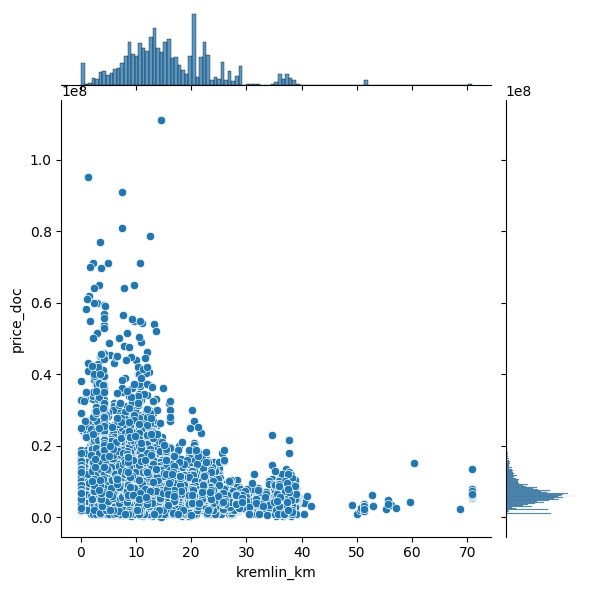

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sber_data = pd.read_csv('data_test/sber_data.csv')
sber_data.head()
display(sber_data.tail())
#Чему равно число строк в таблице?
sber_data.info()
#Сколько районов Москвы и Московской области представлено в данных?
sber_data['sub_area'].nunique()
#Чему равна максимальная цена квартир (price_doc)? Введите это число полностью, без округлений.
#Присмотритесь к нему — не кажется ли оно вам странным? Мы к нему ещё вернемся :)
sber_data['price_doc'].max()
#Проверим, влияет ли уровень экологической обстановки в районе на цену квартиры. Постройте коробчатую диаграмму
#цен на квартиры (price_doc) в зависимости от уровня экологической обстановки в районе (ecology). Какой уровень
#ценится на рынке меньше всего? Введите название этой категории без кавычек.
eco_price = sber_data.set_index('ecology')['price_doc'] #.groupby('ecology')['price_doc']
#sber_data.sort_values(by=['ecology','price_doc']), ascending=[False,True])

fig = plt.figure (figsize=(8,5))
boxplot = px.box (
    sber_data,
    y='ecology',
    x='price_doc',
    #orient='h',
    color='ecology',
    width=1000,
    height=600
)
boxplot.show()

#Постройте диаграмму рассеяния, которая покажет, как цена на квартиру (price_doc) связана с расстоянием до
#центра Москвы (kremlin_km). Выберите все верные утверждения.
sber_data.sort_values(by=['price_doc','kremlin_km'])

joinplot = sns.jointplot (
    data=sber_data,#.sort_values(by=['price_doc','kremlin_km']),
    x='kremlin_km',
    y='price_doc',
    #xlim = (0, 40), what is it?
    #ylim = (0, 0.1),
    height=6,
)
print((sber_data['life_sq'] / sber_data['full_sq']).value_counts(ascending=False))

In [ ]:
"""hospital_beds_raion (количество больничных коек в округе)
preschool_quota (число мест в детском саду в районе);
school_quota (число мест в школах в районе);
life_sq (жилая площадь здания в квадратных метрах). 
floor (число этажей в доме);
metro_min_walk (время от дома до ближайшего метро пешком в минутах);
metro_km_walk (расстояние до ближайшего метро в километрах);
railroad_station_walk_km (расстояние до ближайшей ж. д. станции в километрах);
railroad_station_walk_min (время до ближайшей ж. д. станции пешком в минутах). """

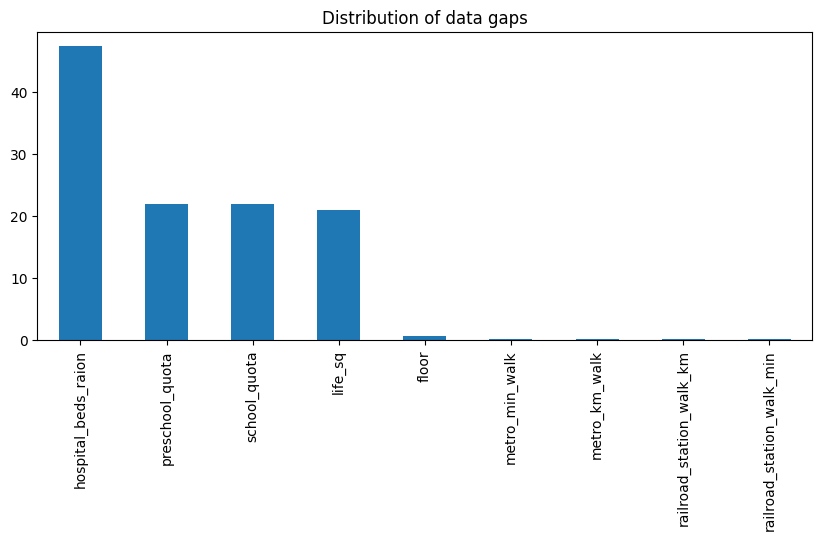

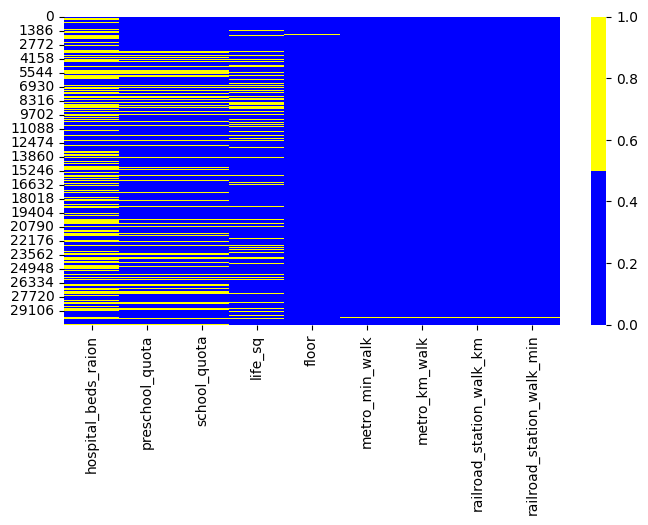

In [7]:
#В библиотеке pandas специально для этого реализован метод isnull(). Этот метод возвращает новый DataFrame,в 
#ячейках которого стоят булевы значения True и False. True ставится на месте, где ранее находилось значение NaN.
sber_data.isnull().tail()
"""Первый способ — это вывести на экран названия столбцов, где число пропусков больше 0. 
Для этого вычислим средний по столбцам результат метода isnull(). Получим долю пропусков в каждом столбце.
True — 1, False — 0, при расчёте среднего получим долю 1 от общего числа строк. 
Умножаем на 100 %, находим столбцы, где доля пропусков больше 0, сортируем по убыванию и выводим результат:"""
cols_null_percent = sber_data.isnull().mean() * 100
cols_with_percent = cols_null_percent[cols_null_percent > 0].sort_values(ascending=False)
cols_with_percent
#Можно воспользоваться столбчатой диаграммой, чтобы визуально оценить соотношение числа пропусков к числу записей.
#Самый быстрый способ построить её — использовать метод plot():
cols_with_percent.plot(
    kind='bar',
    figsize=(10,4),
    title='Distribution of data gaps'
)
#Для создания такой тепловой карты можно воспользоваться результатом метода isnull(). Ячейки таблицы, в которых
#есть пропуск, будем отмечать жёлтым цветом, а остальные — синим. Для этого создадим собственную палитру цветов
#тепловой карты с помощью метода color_pallete() из библиотеки seaborn.
colors=['blue','yellow']
fig = plt.figure(figsize=(8,4))
cols = cols_with_percent.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors),
)

(20888, 60)
Index(['hospital_beds_raion', 'preschool_quota', 'school_quota', 'life_sq',
       'floor', 'metro_min_walk', 'metro_km_walk', 'railroad_station_walk_km',
       'railroad_station_walk_min'],
      dtype='object')


,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,price_doc,hospital_beds_raion_was_null,preschool_quota_was_null,school_quota_was_null,life_sq_was_null,floor_was_null,metro_min_walk_was_null,metro_km_walk_was_null,railroad_station_walk_km_was_null,railroad_station_walk_min_was_null
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,5850000,False,False,False,False,False,False,False,False,False
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,6000000,False,False,False,False,False,False,False,False,False
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,5700000,False,False,False,False,False,False,False,False,False
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,13100000,True,False,False,False,False,False,False,False,False
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,16331452,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,7400000,True,False,False,False,False,False,False,False,False
30467,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,25000000,False,False,False,False,False,False,False,False,False
30468,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,6970959,True,True,True,True,False,False,False,False,False
30469,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,13500000,False,False,False,False,False,False,False,False,False


540.0

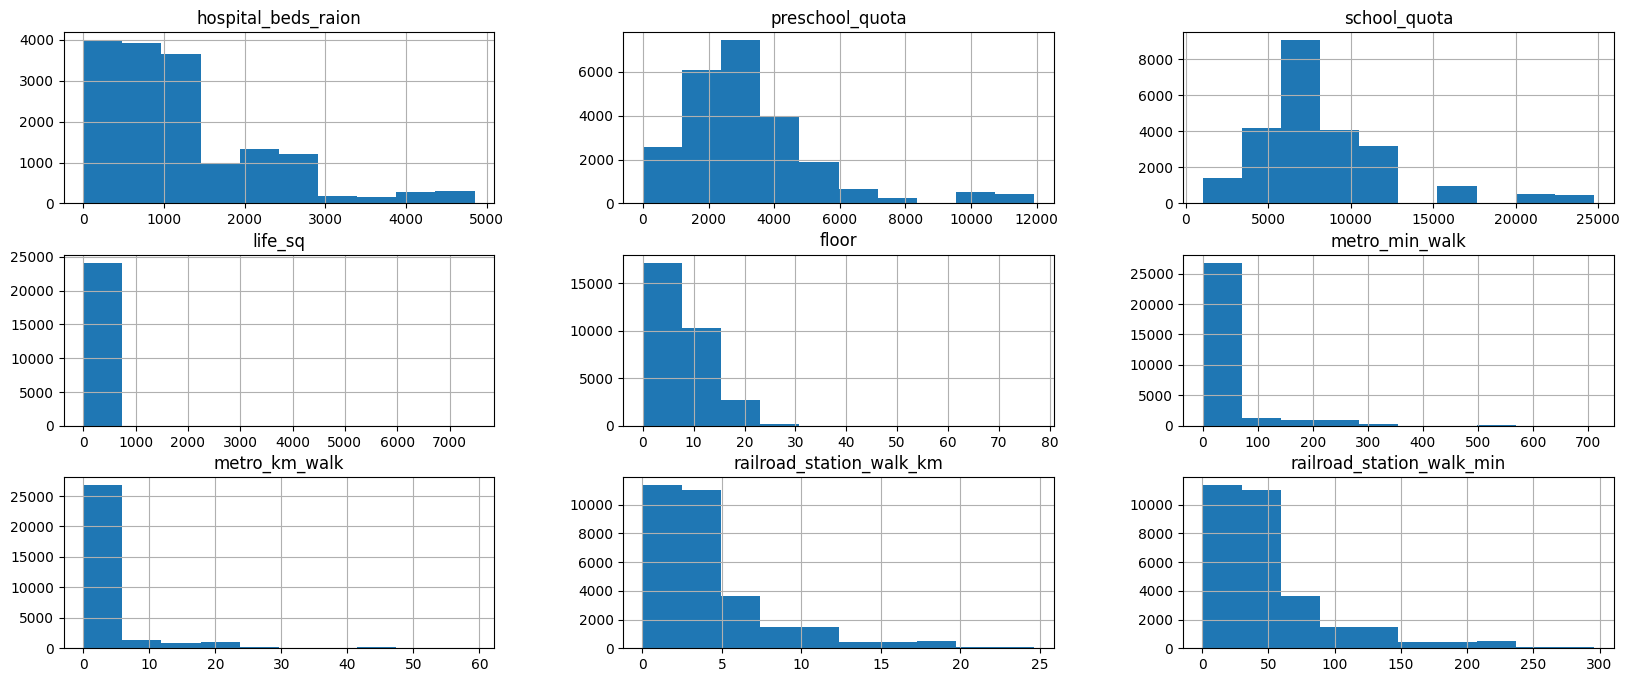

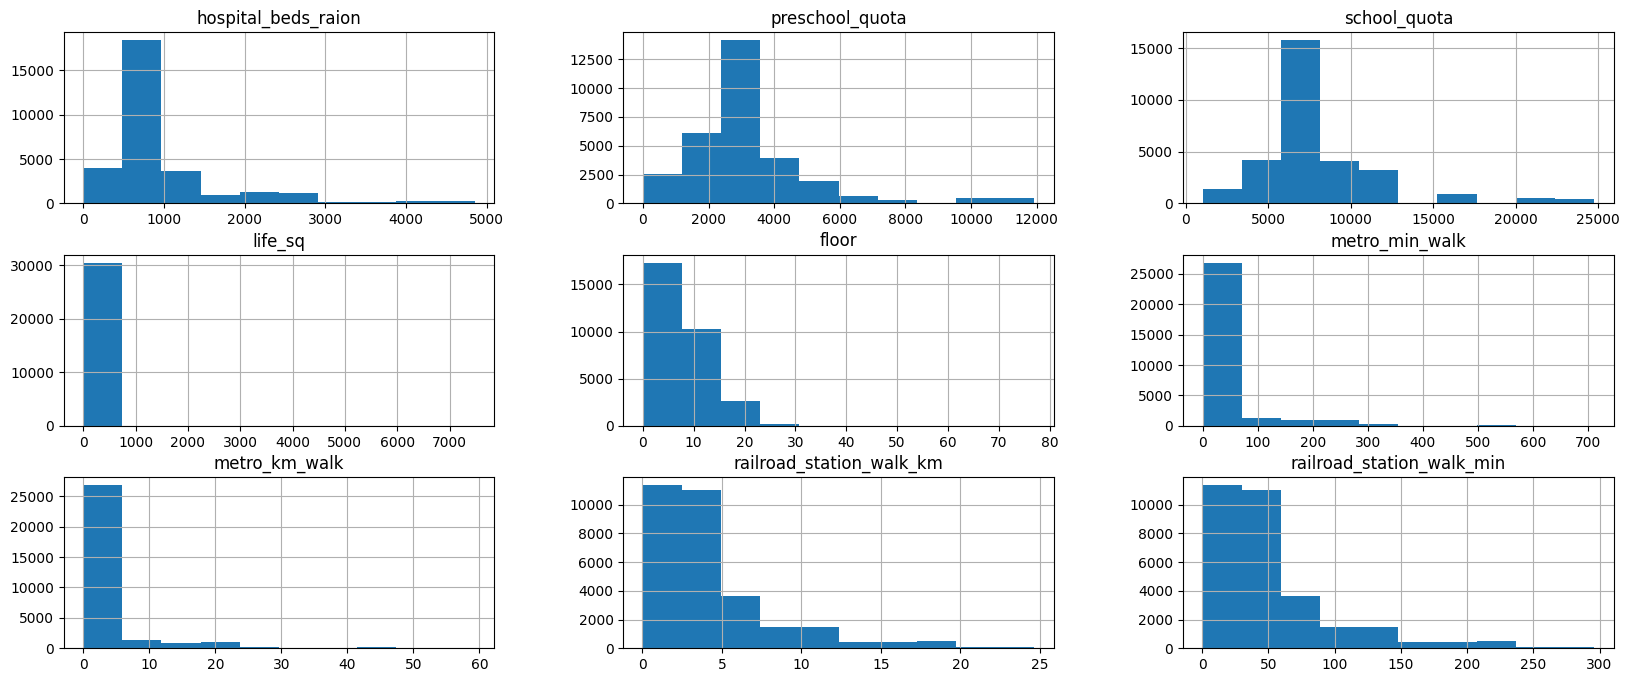

In [34]:
"""Для удаления строк и столбцов будем использовать метод dropna(), который позволяет удалять пропуски с тонким
подходом к настройке. 
Основные параметры метода:
axis — ось, по которой производится удаление (по умолчанию 0 — строки).
how — как производится удаление строк (any — если хотя бы в одном из столбцов есть пропуск, стоит по умолчанию;
all — если во всех столбцах есть пропуски). 
thresh — порог удаления. Определяет минимальное число непустых значений в строке/столбце, при котором она/он
сохраняется. Например, если мы установим thresh в значение 2, то мы удалим строки, где число пропусков больше
чем n-2 и более, где n — число признаков (если axis=0)."""
#создаем копию исходной таблицы
drop_data = sber_data.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(thresh=thresh, axis=1)
#удаляем записи, в которых есть хотя бы 1 пропуск
drop_data = drop_data.dropna(how='any', axis=0)
#отображаем результирующую долю пропусков
drop_data.isnull().mean()
#Посмотрим на результирующее число записей:
#Итак, мы удалили один столбец и ⅓ всех записей для того, чтобы избавиться от пропусков. Cлишком это много.
print(drop_data.shape)

cols = cols_with_percent.index
sber_data[cols].hist(figsize=(20,8));
drop_data['floor'].mode()

"""Заполнение значений осуществляется с помощью метода fillna(). Главный параметр метода — value (значение, на
которое происходит заполнение данных в столбце). Если метод вызывается от имени всего DataFrame, то в качестве
value можно использовать словарь, где ключи — названия столбцов таблицы, а значения словаря — заполняющие константы. 
Создадим такой словарь, соблюдая рекомендации, приведённые выше, а также копию исходной таблицы. Произведём 
операцию заполнения с помощью метода fillna() и удостоверимся, что пропусков в данных больше нет:"""

#создаем копию исходной таблицы
fill_data = sber_data.copy()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'life_sq': fill_data['full_sq'],
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
fill_data = fill_data.fillna(values)
#выводим результирующую долю пропусков
fill_data.isnull().mean()
#Посмотрим, на то, как изменились распределения наших признаков:
cols = cols_with_percent.index
fill_data[cols].hist(figsize=(20,8))
fill_data.sort_values(by=['life_sq','full_sq'])

print(cols_with_percent.index)
#создаем копию исходной таблицы
indicator_data = sber_data.copy()
#в цикле пробегаемся по названиям столбцов с пропусками
for col in cols_with_null.index:
    #создаем новый признак-индикатор как col_was_null
    indicator_data[col + '_was_null'] = indicator_data[col].isnull()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски   
values = {
    'life_sq': indicator_data['full_sq'],
    'metro_min_walk': indicator_data['metro_min_walk'].median(),
    'metro_km_walk': indicator_data['metro_km_walk'].median(),
    'railroad_station_walk_km': indicator_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': indicator_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': indicator_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': indicator_data['preschool_quota'].mode()[0],
    'school_quota': indicator_data['school_quota'].mode()[0],
    'floor': indicator_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
indicator_data = indicator_data.fillna(values)
#выводим результирующую долю пропусков
indicator_data.isnull().mean()


In [2]:
#создаём копию исходной таблицы
combine_data = sber_data.copy()

#отбрасываем столбцы с числом пропусков более 30% (100-70)
n = combine_data.shape[0] #число строк в таблице
thresh = n*0.7
combine_data = combine_data.dropna(thresh=thresh, axis=1)

#отбрасываем строки с числом пропусков более 2 в строке
m = combine_data.shape[1] #число признаков после удаления столбцов
combine_data = combine_data.dropna(thresh=m-2, axis=0)

#создаём словарь 'имя_столбца': число (признак), на который надо заменить пропуски 
values = {
    'life_sq': combine_data['full_sq'],
    'metro_min_walk': combine_data['metro_min_walk'].median(),
    'metro_km_walk': combine_data['metro_km_walk'].median(),
    'railroad_station_walk_km': combine_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': combine_data['railroad_station_walk_min'].median(),
    'preschool_quota': combine_data['preschool_quota'].mode()[0],
    'school_quota': combine_data['school_quota'].mode()[0],
    'floor': combine_data['floor'].mode()[0]
}
#заполняем оставшиеся записи константами в соответствии со словарем values
combine_data = combine_data.fillna(values)
#выводим результирующую долю пропусков
display(combine_data.isnull().mean())
#Выведем результирующее число строк и столбцов:

print(combine_data.shape)
(26800, 60)
#Какой из приведённых ниже кодов найдёт общее число пропусков в каждом столбце таблицы sber_data?
display(sber_data.isnull().sum())
#Какие методы визуализации помогают понять примерное соотношение пропусков в данных? Выберите все верные варианты.
import plotly
import plotly.express as px
import seaborn as sns
null_df = sber_data.isnull().mean() * 100
gap_df = null_df[null_df > 0].sort_values(ascending=False)
print (gap_df)

cols = gap_df.index
print(sber_data[cols])

gap_df.plot(
    kind='bar',
    figsize=(8,3)
)

colors = ['green','red']
fig=plt.figure(figsize=(8,4))
pic = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors)
)
#Вам предоставлен условный DataFrame data, в котором есть пропуски. Выберите код, который позволит удалить только
#те записи, для которых отсутствуют все значения признаков.
data.dropna(axis=0, how='all')
#Вам предоставлен условный DataFrame data, в котором есть пропуски. Число столбцов в этой таблице — 5. Выберите
#код, который позволит удалить записи, где отсутствует более двух признаков одновременно.
data.dropna(axis=0, thresh=3)
#Вам предоставлен условный DataFrame data, в котором есть пропуски в столбцах price (цена товара) и count_orders
#(количество заказов). Какой из приведённых ниже кодов позволит заполнить цену товара медианным значением, а 
#количество заказов — нулём?
data.fillna(value={'price': data['price'].median(), 'count_orders': 0})
"""Ваша задача — очистить данную таблицу от пропусков следующим образом:

Если признак имеет больше 50 % пропущенных значений, удалите его.
Для оставшихся данных: если в строке более двух пропусков, удалите строку.
Для оставшихся данных: числовые признаки заполните средним значением, а категориальные — модой."""
import pandas as pd
test_df = pd.read_csv('test_data.csv',sep=',')
test_df = test_df.dropna(axis=1,thresh=test_df.shape[0]*0.5)
test_df = test_df.dropna(axis=0,thresh=2)
values = {
    'one':test_df['one'].mean(),
    'two':test_df['two'].mean(),
    'three':test_df['three'].mean(),
    'four':test_df['four'].mode()[0]
}
test_df = test_df.fillna(values)
print(test_df)

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

(26800, 60)


(26800, 60)

The number of outliers according to Tukey's method:963
The resulting number of records:29508
Outliers=59
-0.14263612203024953
Outliers by Z-method of deviation:33
Result of cleaned data:30438
['Poselenie Rogovskoe' 'Poselenie Kievskij']
(0, 61)
Outliers in price:68
92


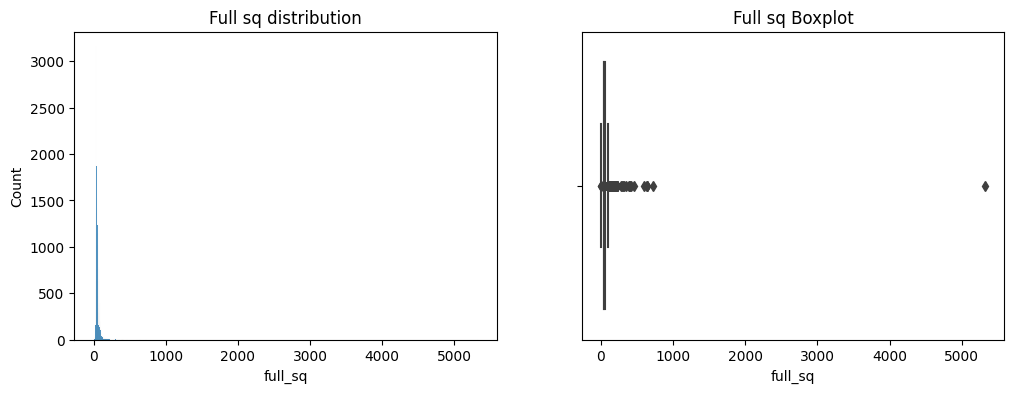

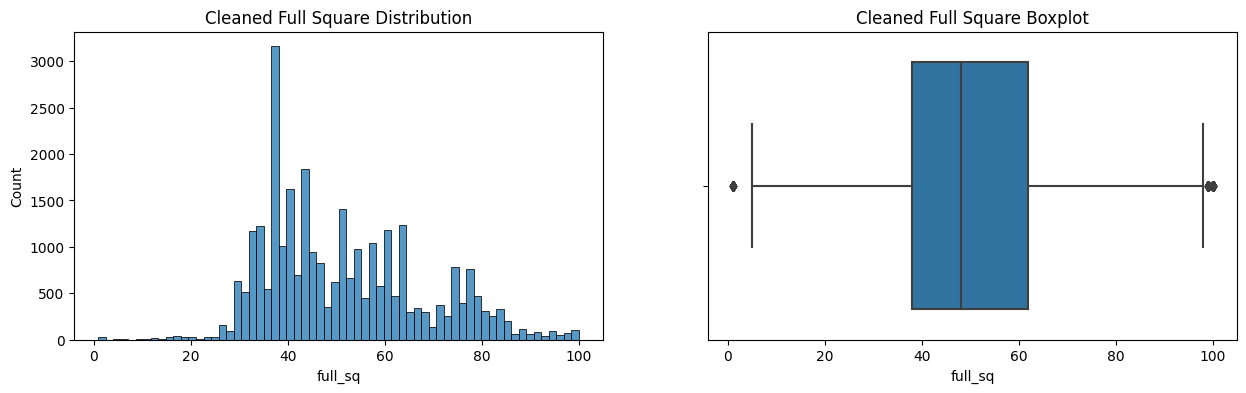

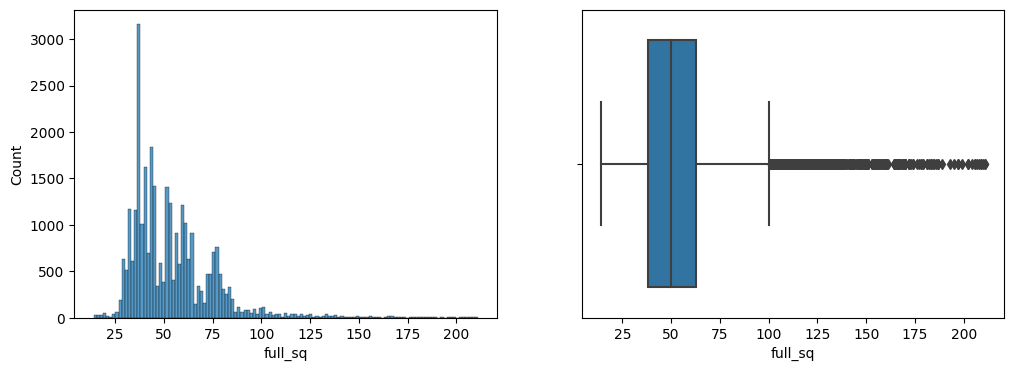

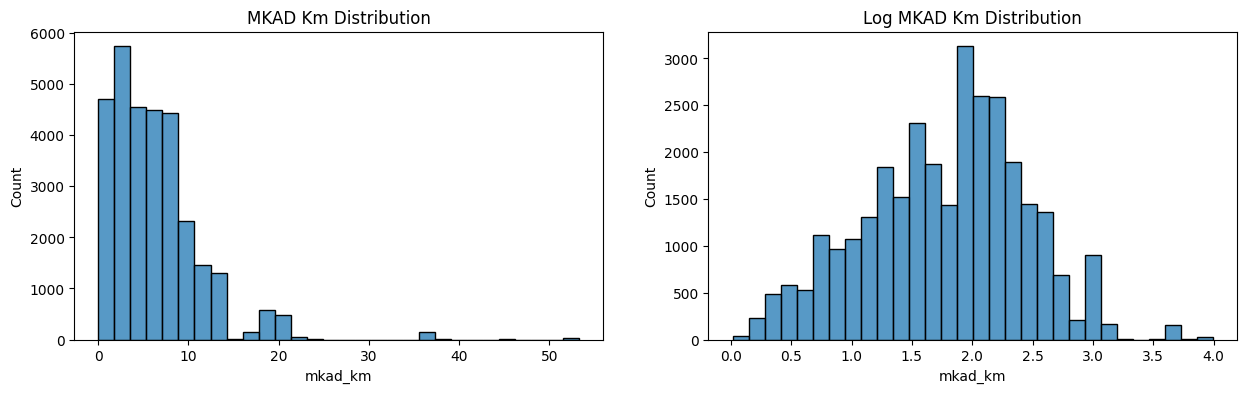

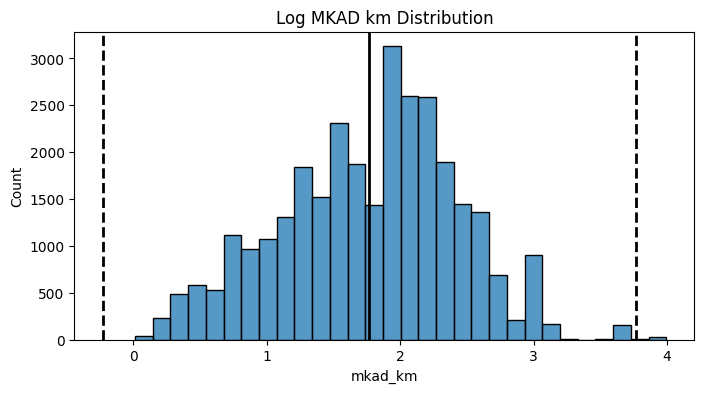

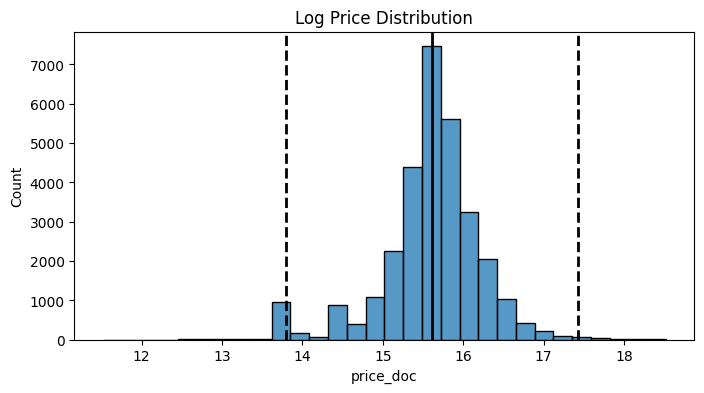

In [11]:
"""Методы выявления выбросов
1/МЕТОД РУЧНОГО ПОИСКА И ЗДРАВОГО СМЫСЛА"""
#Сделать это можно с помощью уже знакомого вам метода describe(). Рассчитаем статистические показатели для
#признака жилой площади (life_sq).
sber_data['life_sq'].describe()
#Найдём число квартир с нулевой жилой площадью:
sber_data[sber_data['life_sq'] == 0]
#А теперь выведем здания с жилой площадью более 7 000 квадратных метров:
sber_data[sber_data['life_sq'] > 7000]
#Логичен вопрос: а много ли у нас таких квартир, у которых жилая площадь больше, чем суммарная?
#Давайте проверим это с помощью фильтрации:
#outliers = sber_data[sber_data['life_sq'] > sber_data['full_sq']]
#print(outliers.shape[0])
#Таких квартир оказывается 37 штук. Подобные наблюдения уже не поддаются здравому смыслу — они являются ошибочными,
#и от них стоит избавиться. Для этого можно воспользоваться методом drop() и удалить записи по их индексам:
#cleaned = sber_data.drop(outliers.index, axis=0)
#print(f'Result:{cleaned.shape[0]}')
#Ещё пример: давайте посмотрим на признак числа этажей (floor).
sber_data['floor'].describe()
#Снова видим подозрительную максимальную отметку в 77 этажей. Проверим все квартиры, которые находятся выше 50 этажей
sber_data[sber_data['floor'] > 50]

"""МЕТОД МЕЖКВАРТИЛЬНОГО РАЗМАХА (МЕТОД ТЬЮКИ)"""
#Построим гистограмму и коробчатую диаграмму для признака полной площади (full_sq):
fig,axes = plt.subplots (nrows=1,ncols=2,figsize=(12,4))
pic1 = sns.histplot(data=sber_data, x='full_sq', ax=axes[0]);
pic1.set_title('Full sq distribution');
pic2 = sns.boxplot(data=sber_data, x='full_sq', ax=axes[1]);
pic2.set_title('Full sq Boxplot');

"""В соответствии с этим алгоритмом напишем функцию outliers_iqr(), которая вам может ещё не раз пригодиться в
реальных задачах. Эта функция принимает на вход DataFrame и признак, по которому ищутся выбросы, а затем возвращает
потенциальные выбросы, найденные с помощью метода Тьюки, и очищенный от них датасет.
Квантили вычисляются с помощью метода quantile(). Потенциальные выбросы определяются при помощи фильтрации данных по
условию выхода за пределы верхней или нижней границы."""

def outliers_iqr (data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
# Применим эту функцию к таблице sber_data и признаку full_sq, а также выведем размерности результатов:
outliers,cleaned = outliers_iqr(sber_data,'full_sq')
print(f"The number of outliers according to Tukey's method:{outliers.shape[0]}")
print(f"The resulting number of records:{cleaned.shape[0]}")
#Согласно классическому методу Тьюки, под выбросы у нас попали 963 записи в таблице. Давайте построим гистограмму
#и коробчатую диаграмму на новых данных cleaned_sber_data:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

#Давайте немного модифицируем функцию outliers_iqr(). Добавьте в неё параметры left и right, которые задают число
#IQR влево и вправо от границ ящика (пусть по умолчанию они равны 1.5). Функция, как и раньше, должна возвращать
#потенциальные выбросы и очищенный DataFrame.
#outliers_iqr_mod
def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x> upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned
#Давайте ослабим границы метода Тьюки справа и усилим их влево. Примените модифицированную функцию outliers_iqr_mod()
#к признаку full_sq из таблицы sber_data данным с параметрами left=1 и right=6. Результаты работы поместите в
#переменные outliers и cleaned. Чему равно результирующее число выбросов в данных?
outliers,cleaned=outliers_iqr_mod(sber_data,'full_sq',left=1,right=6)
print(f"Outliers={outliers.shape[0]}")
#Если мы построим гистограмму и коробчатую диаграмму на полученных данных, то увидим вот такую картинку:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
pic1 = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
pic2 = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

"""Построим две гистограммы признака расстояния до МКАД (mkad_km): первая — в обычном масштабе, а вторая —
в логарифмическом. Логарифмировать будем с помощью функции log() из библиотеки numpy (натуральный логарифм —
логарифм по основанию числа e). Признак имеет среди своих значений 0. Из математики известно, что логарифма от 0
не существует, поэтому мы прибавляем к нашему признаку 1, чтобы не логарифмировать нули и не получать предупреждения."""
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
#гистограмма исходного признака
histplot = sns.histplot(sber_data['mkad_km'], bins=30, ax=axes[0])
histplot.set_title('MKAD Km Distribution');
#гистограмма в логарифмическом масштабе
log_mkad_km= np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km , bins=30, ax=axes[1])
histplot.set_title('Log MKAD Km Distribution');
#Примечание: Численный показатель асимметрии можно вычислить с помощью метода:skew():
print(log_mkad_km.skew())
# -0.14263612203024953  [Асимметрия распределения называется левосторонней, если она отрицательная:As<0]
#[Асимметрия распределения называется правосторонней, если она положительная:As>0]
"""Напишем функцию outliers_z_score(), которая реализует этот алгоритм. 
На вход она принимает DataFrame и признак, по которому ищутся выбросы. В дополнение добавим в функцию возможность
работы в логарифмическом масштабе: для этого введём аргумент log_scale. Если он равен True, то будем логарифмировать
рассматриваемый признак, иначе — оставляем его в исходном виде.
Как и раньше, функция будет возвращать выбросы и очищенные от них данные:"""
def outliers_z_score(data,feature,log_scale=False):
    if log_scale:
        x=np.log(data[feature]+1)
    else:
        x=data[feature]
    mu=x.mean()
    sigma=x.std()
    lower_bound=mu-3*sigma
    upper_bound=mu+3*sigma
    outliers=data[(x<lower_bound)|(x>upper_bound)]
    cleaned=data[(x>lower_bound)&(x<upper_bound)]
    return outliers,cleaned
#Применим эту функцию к таблице sber_data и признаку mkad_km, а также выведем размерности результатов:
outliers,cleaned=outliers_z_score(sber_data,'mkad_km',log_scale=True)
print(f"Outliers by Z-method of deviation:{outliers.shape[0]}")
print(f"Result of cleaned data:{cleaned.shape[0]}")
#Давайте узнаем, в каких районах (sub_area) представлены эти квартиры:
print(outliers['sub_area'].unique())

"""Возможно, мы не учли того факта, что наш логарифм распределения всё-таки не идеально нормален и в нём присутствует
некоторая асимметрия. Возможно, стоит дать некоторое «послабление» на границы интервалов? Давайте отдельно построим
гистограмму прологарифмированного распределения, а также отобразим на гистограмме вертикальные линии, соответствующие
среднему (центру интервала в методе трёх сигм) и границы интервала mu+3sigma. Вертикальные линии можно построить с
помощью метода axvline(). Для среднего линия будет обычной, а для границ интервала — пунктирной (параметр ls ='--'"""
fig,ax=plt.subplots(1,1,figsize=(8,4))
log_mkad_km=np.log(sber_data['mkad_km']+1)
pic1=sns.histplot(log_mkad_km,bins=30,ax=ax)
pic1.axvline(log_mkad_km.mean(),color='k',lw=2)
pic1.axvline(log_mkad_km.mean()+3*log_mkad_km.std(),color='k',ls='--',lw=2)
pic1.axvline(log_mkad_km.mean()-3*log_mkad_km.std(),color='k',ls='--',lw=2)
pic1.set_title('Log MKAD km Distribution')

#Давайте расширим правило трёх сигм, чтобы иметь возможность особенности данных. Добавьте в функцию outliers_z_score()
#параметры left и right, которые будут задавать число сигм (стандартных отклонений) влево и вправо соответственно,
#определяющее границы метода z-отклонения. По умолчанию оба параметры равны 3. Результирующую функцию назовите
#outliers_z_score_mod().
def outliers_z_score_mod(
    data,feature,log_scale=False,left=3,right=3):
    if log_scale==True:
        x=np.log(data[feature]+1)
    else:
        x=data[feature]
    mu=x.mean()
    sigma=x.std()
    lower_bound=mu-left*sigma
    upper_bound=mu+right*sigma
    outliers=data[(x<lower_bound)|(x>upper_bound)]
    cleaned=data[(x>lower_bound)&(x<upper_bound)]
    return outliers,cleaned
#Проверьте, что будет, если дать «послабление» вправо, увеличив число сигм. Наша задача — узнать, начиная с какой
#границы поселения «Роговское» и «Киевское» перестают считаться выбросами. Примените свою функцию outliers_z_score_mod()
#к признаку mkad_km с параметрами left=3, right=3.5, log_scale=True. Чему равно результирующее число выбросов?
outliers,cleaned=outliers_z_score_mod(sber_data,'mkad_km',log_scale=True,left=3,right=3.5)
print(outliers.shape)
#Постройте гистограмму для признака price_doc в логарифмическом масштабе. А также, добавьте на график линии,
#отображающие среднее и границы интервала для метода трех сигм. Выберите верные утверждения:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_price = np.log(sber_data['price_doc'])
histplot = sns.histplot(log_price, bins=30, ax=ax)
histplot.set_title('Log Price Distribution');
histplot.axvline(log_price.mean(), color='k', lw=2)
histplot.axvline(log_price.mean()+ 3 * log_price.std(), color='k', ls='--', lw=2)
histplot.axvline(log_price.mean()- 3 * log_price.std(), color='k', ls='--', lw=2);
#Найдите потенциальные выбросы с помощью метода z-отклонения. Используйте логарифмический масштаб распределения.
#Сделайте «послабление» на 0.7 сигм в в обе стороны распределения. Сколько выбросов вы получили?
outliers,cleaned=outliers_z_score_mod(sber_data,'price_doc',log_scale=True,left=3,right=3.7)
print(f"Outliers in price:{outliers.shape[0]}")
#Добавьте фишку с логарифмированием в свою функцию outliers_iqr_mod(). Добавьте в неё параметр log_scale. Если он
#выставлен в True, то производится логарифмирование признака. Примените полученную функцию к признаку price_doc.
#Число межквартильных размахов в обе стороны обозначьте как 3. Чему равно число выбросов, полученных таким методом?
#При логарифмировании признака price_doc добавлять к нему 1 не нужно, он не имеет нулевых значений!
def outliers_iqr_log_mod(data, feature,log_scale=False, left=3, right=3):
    if log_scale==True:
        x=np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x> upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers,cleaned=outliers_iqr_log_mod(sber_data,'price_doc',log_scale=True)
print(outliers.shape[0])

In [3]:
#Проверим, есть у нас такие записи: для этого сравним число уникальных значений в столбце id с числом строк. Число
#уникальных значений вычислим с помощью метода nunique():
sber_data['id'].nunique()==sber_data.shape[0]#sber_data['id'].count()
"""Чтобы отследить дубликаты, можно воспользоваться методом duplicated(), который возвращает булеву маску для
фильтрации. Для записей, у которых совпадают признаки, переданные методу, он возвращает True, для остальных — False.
У метода есть параметр subset — список признаков, по которым производится поиск дубликатов. По умолчанию используются
все столбцы в DataFrame и ищутся полные дубликаты.
To find duplicates on specific column(s), use subset: df.duplicated(subset=['column'])"""
#Найдём число полных дубликатов таблице sber_data. Предварительно создадим список столбцов dupl_columns, по которым
#будем искать совпадения (все столбцы, не включая id). 
#Создадим маску дубликатов с помощью метода duplicated() и произведём фильтрацию. Результат заносим в переменную
#sber_duplicates. Выведем число строк в результирующем DataFrame:
dupl_columns=list(sber_data.columns)
dupl_columns.remove('id')

mask=sber_data.duplicated(subset=dupl_columns)
print(f"mask duplicates value: {mask.value_counts()}")
sber_duplicates=sber_data[mask]
print(f"Amount of found duplicates = {sber_duplicates.shape[0]}")
"""Теперь нам необходимо от них избавиться. Для этого легче всего воспользоваться методом drop_duplicates(),
который удаляет повторяющиеся записи из таблицы. """
#Создадим новую таблицу sber_dedupped, которая будет версией исходной таблицы, очищенной от полных дубликатов.
sber_dedupped=sber_data.drop_duplicates(subset=dupl_columns)
print(f"Result of processed data = {sber_dedupped.shape[0]}")

"""Разберём алгоритм:
→Создаём пустой список low_information_cols, куда будем добавлять названия признаков, которые мы посчитаем неинформативными.
→В цикле пройдёмся по всем именам столбцов в таблице и для каждого будем совершать следующие действия:
рассчитаем top_freq — наибольшую относительную частоту с помощью метода value_counts() с параметром normalize=True.
Метод вернёт долю от общих данных, которую занимает каждое уникальное значение в признаке.
Например, для столбца oil_chemistry_raion (нефтехимический район) результат будет следующим:
no 0.990286
yes 0.009714
Name: oil_chemistry_raion, dtype: float64
Отсюда нам нужен максимум.
рассчитаем nunique_ratio — отношение числа уникальных значений в столбце к размеру всего столбца. Число уникальных
значений в столбце получим с помощью метода nunique(), а размер признака — с помощью метода count(). Например, для
столбца id число уникальных значений — 30471; оно же равно размеру таблицы. Поэтому результат отношения будет 1.
сравним каждое из полученных чисел с пороговым значением (у нас это 0.95) и добавим в список неинформативных
признаков, если условие истинно."""
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in sber_data.columns:
    #наибольшая относительная частота в признаке
    top_freq = sber_data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = sber_data[col].nunique() / sber_data[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')
        
#Итак, мы нашли шесть неинформативных признаков. Теперь можно удалить их с помощью метода drop(), передав
#результирующий список в его аргументы.
information_sber_data=sber_data.drop(low_information_cols,axis=1)
print(f"Resulting number of features = {information_sber_data.shape[1]}")


mask duplicates value: False    29909
True       562
dtype: int64
Amount of found duplicates = 562
Result of processed data = 29909
id: 100.0% уникальных значений
oil_chemistry_raion: 99.03% одинаковых значений
railroad_terminal_raion: 96.27% одинаковых значений
nuclear_reactor_raion: 97.17% одинаковых значений
big_road1_1line: 97.44% одинаковых значений
mosque_count_1000: 98.08% одинаковых значений
Result number of features = 55


In [1]:
"""Вам предоставлен набор данных, первоначально полученный в Национальном институте диабета, болезней органов
пищеварения и почек. Этот набор данных создан для того, чтобы на основе определённых диагностических измерений
предсказать, есть ли у пациента диабет. На выбор этих экземпляров из более крупной базы данных было наложено
несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года индейского происхождения Пима."""
#Прочитаем наши данные и выведем первые пять строк таблицы:
import pandas as pd
diabetes=pd.read_csv('data_test/diabetes_data.csv')
diab_df = diabetes.copy()
diabetes.tail()
"""Pregnancies — количество беременностей.
Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.
BloodPressure — диастолическое артериальное давление (мм рт. ст.).
SkinThickness — толщина кожной складки трицепса (мм).
Insulin — двухчасовой сывороточный инсулин (ме Ед/мл).
BMI — индекс массы тела (\(\frac{вес\ в\ кг}{(рост\ в\ м)^2}\)).
DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).
Age — возраст.
Outcome — наличие диабета (0 — нет, 1 — да)."""
#Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте
#все признаки в данных. Сколько записей осталось в данных?
duplicates = diabetes[diabetes.duplicated()]
print('Число дубликтов: {}'.format(duplicates.shape[0]))
diabetes = diabetes.drop_duplicates()
print('Результирующее число записей: {}'.format(diabetes.shape[0]))
#Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога информативности возьмите
#0.95: удалите все признаки, для которых 95 % значений повторяются или 95 % записей уникальны. В ответ запишите имена
#признаков, которые вы нашли (без кавычек).

"""def low_informative_feature(data):
    low_information_cols = []
    for col in data.columns:
        top_freq = data[col].value_counts(normalize=True).max()
        nunique_ratio = data[col].nunique() / data[col].count()
        if top_freq > 0.95:
            low_information_cols.append(col)
        if nunique_ratio > 0.95:
            low_information_cols.append(col)
    return low_information_cols
low_information_cols = low_informative_feature(diabetes)
print(low_information_cols)
"""

low_information_cols=[]
for col in diabetes.columns:
    top_freq=diabetes[col].value_counts(normalize=True).max()
    nunique_ratio=diabetes[col].nunique()/diabetes[col].count()
    if top_freq>0.95:
        low_information_cols.append(top_freq)
        print(f"most repeated column:{col} - {top_freq*100}")
    if nunique_ratio>0.95:
        low_information_cols.append(nunique_ratio)
        print(f"most unique column:{col} - {nunique_ratio}")
diabetes = diabetes.drop(['Gender'],axis=1)
#Попробуйте найти пропуски в данных с помощью метода isnull().
diabetes.isnull().count()
#Спойлер: ничего не найдёте. А они есть! Просто они скрыты от наших глаз. В таблице пропуски в столбцах Glucose,
#BloodPressure, SkinThickness, Insulin и BMI обозначены нулём, поэтому традиционные методы поиска пропусков ничего
#вам не покажут. Давайте это исправим!
#Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска.
#Его вы можете взять из библиотеки numpy: np.nan.
#Какая доля пропусков содержится в столбце Insulin? Ответ округлите до сотых.
"""Подсказка (1 из 1): Создайте функцию, которая возвращает np.nan, если её аргумент равен 0, в противном случае —
возвращает аргумент. Воспользуйтесь методом apply() и примените созданную функцию для каждого перечисленного столбца.
def nan_function(x):
    return np.nan if x == 0 else x
diabetes["Glucose"] = diabetes["Glucose"].apply(nan_function)
diabetes["BloodPressure"] = diabetes["BloodPressure"].apply(nan_function)
diabetes["SkinThickness"] = diabetes["SkinThickness"].apply(nan_function)
diabetes["Insulin"] = diabetes["Insulin"].apply(nan_function)
diabetes["BMI"] = diabetes["BMI"].apply(nan_function)
diabetes.isnull().mean().round(2).sort_values(ascending=False)"""
import numpy as np
for col in diabetes.columns:# emulation for col,i in emulate #for trinity[i] - to iterate every col with more than 0.3
    diabetes.loc[diabetes[col]==0,col]=np.nan #diabetes[diabetes[col]==0][col]
    diabetes[diabetes[col]==0][col]
    diabetes.loc[diabetes[col]==0,col]=np.nan
    #print(round(diabetes[col].isnull().value_counts(normalize=True),2))
h_dr = round(diabetes['Insulin'].isnull().value_counts(normalize=True),2)
print(h_dr[True]>0.3)
#Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков осталось в ваших данных
#(с учетом удаленных неинформативных признаков в задании 8.2)?
"""for col in diabetes.columns:
    if (round(diabetes[col].isnull().value_counts(normalize=True),2))[True]>0.3:
        print(diabetes[col])"""
        
thresh = diabetes.shape[0]*0.7
diabetes = diabetes.dropna(thresh=thresh, axis=1)
print(diabetes.shape[1])
#diabetes=diabetes.drop(['Outcome'],axis=1)
#Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. Чему равно результирующее
#число записей в таблице?
diabetes=diabetes.dropna(axis=0,thresh=5)
print(diabetes.shape)
diabetes.info()
"""m = diabetes.shape[1]
diabetes = diabetes.dropna(thresh=m-2, axis=0)
print(diabetes.shape[0])"""
#В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness?
#Ответ округлите до десятых.
"""null_data = diabetes.isnull().sum()
cols = null_data[null_data>0].index
for col in cols:
    diabetes[col] = diabetes[col].fillna(diabetes[col].median())
print(diabetes['SkinThickness'].mean().round(1))"""

fill_diabetes=diabetes.copy()
values={
    'Pregnancies':diabetes['Pregnancies'].median(),
    'Glucose':diabetes['Glucose'].median(),
    'BloodPressure':diabetes['BloodPressure'].median(),
    'SkinThickness':diabetes['SkinThickness'].median(),
    'BMI':diabetes['BMI'].median(),
    'DiabetesPedigreeFunction':diabetes['DiabetesPedigreeFunction'].median(),
    'Age':diabetes['Age'].median()
}
fill_diabetes=fill_diabetes.fillna(values)
round(fill_diabetes['SkinThickness'].mean(),1)

#Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, _ = outliers_iqr_mod(diabetes, 'SkinThickness')
print("Outliers by iqr method:",outliers.shape[0])

#Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, _ = outliers_z_score_mod(diabetes, 'SkinThickness')
print("Outliers by z score method",outliers.shape[0])

#На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction. Такой вид распределения очень
#похож на логнормальный, и он заставляет задуматься о логарифмировании признака. Найдите сначала число выбросов в
#признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.
#Затем найдите число выбросов в этом же признаке в логарифмическом масштабе (при логарифмировании единицу прибавлять
#не нужно!). Какова разница между двумя этими числами (вычтите из первого второе)?
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outliers, _ = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction')
outliers_log, _ = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction', log_scale=True)
print(outliers.shape[0] - outliers_log.shape[0])

Число дубликтов: 10
Результирующее число записей: 768
most repeated column:Gender - 100.0
True
7
(752, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               651 non-null    float64
 1   Glucose                   747 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   BMI                       748 non-null    float64
 5   DiabetesPedigreeFunction  752 non-null    float64
 6   Age                       752 non-null    float64
dtypes: float64(7)
memory usage: 47.0 KB
Outliers by iqr method: 3
Outliers by z score method 2
29


In [ ]:
"""Имеются две базы данных (два листа Excel-файла): база с ценами конкурентов (Data_Parsing) и внутренняя база
компании (Data_Company).В базе парсинга есть два id, однозначно определяющие товар: producer_id и producer_color.
В базе компании есть два аналогичных поля: item_id и color_id.
Нам известно, что коды в двух базах отличаются наличием набора служебных символов.
В базе парсинга встречаются следующие символы: _, -, ~, \\, /.
Необходимо:
Считать данные из Excel в DataFrame (Data_Parsing) и (Data_Company).
Подтянуть к базе парсинга данные из базы компании (item_id, color_id, current_price) и сформировать столбец разницы
цен в % (цена конкурента к нашей цене).
Определить сильные отклонения от среднего в разности цен в пределах бренда-категории (то есть убрать случайные
выбросы, сильно искажающие сравнение). Критерий — по вкусу, написать комментарий в коде.
Записать новый файл Excel с базой парсинга, приклееными к ней столбцами из пункта 2 и с учётом пункта 3
(можно добавить столбец outlier и проставить Yes для выбросов)."""

In [27]:
null_data = diabetes.isnull().sum()
print(null_data)
cols = null_data[null_data>0].index
print(cols)
for col in cols:
    diabetes[col] = diabetes[col].fillna(diabetes[col].median())
    print(diabetes[col])
print(diabetes['SkinThickness'].mean().round(1))


Pregnancies                 101
Glucose                       5
BloodPressure                19
SkinThickness               211
BMI                           4
DiabetesPedigreeFunction      0
Age                           0
dtype: int64
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI'], dtype='object')
0       6.0
1       2.0
2       2.0
3       8.0
4       7.0
       ... 
762     2.0
763     5.0
764     1.0
765    10.0
767     4.0
Name: Pregnancies, Length: 752, dtype: float64
0       98.0
1      112.0
2      108.0
3      107.0
4      136.0
       ...  
762    122.0
763    139.0
764     96.0
765    101.0
767    125.0
Name: Glucose, Length: 752, dtype: float64
0       58.0
1       75.0
2       64.0
3       80.0
4       90.0
       ...  
762     76.0
763     64.0
764    122.0
765     86.0
767     96.0
Name: BloodPressure, Length: 752, dtype: float64
0      33.0
1      32.0
2      29.0
3      29.0
4      29.0
       ... 
762    27.0
763    35.0
764    29.0
765    

In [14]:
def nan_function(x):
    return np.nan if x==0 else x
diab_df['Outcome']=diab_df['Outcome'].apply(nan_function)
diab_df['Outcome'].isnull().value_counts()

True     510
False    268
Name: Outcome, dtype: int64

In [8]:
import numpy as np
diab_df.info()
for col in diab_df.columns:
    for i in diab_df[col]:
        if i==0:
            i=np.nan
#diab_df.loc[diab_df['Insulin']==0,'Insulin']=np.nan
diab_df['Insulin']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               778 non-null    int64  
 1   Glucose                   778 non-null    int64  
 2   BloodPressure             778 non-null    int64  
 3   SkinThickness             778 non-null    int64  
 4   Insulin                   398 non-null    float64
 5   BMI                       778 non-null    float64
 6   DiabetesPedigreeFunction  778 non-null    float64
 7   Age                       778 non-null    int64  
 8   Outcome                   778 non-null    int64  
 9   Gender                    778 non-null    object 
dtypes: float64(3), int64(6), object(1)
memory usage: 60.9+ KB


0      190.0
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
773    190.0
774     76.0
775      NaN
776    126.0
777      NaN
Name: Insulin, Length: 778, dtype: float64

In [5]:
display(diabetes)
dupl_columns=list(diabetes.columns)
mask=diabetes.duplicated(subset=dupl_columns)
print(f"Mask: {mask}")
diabetes_duplic=diabetes[mask]

print(f"Amount of found duplicates = {diabetes_duplic.shape[0]}")

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,6.0,98.0,58.0,33.0,34.0,0.430,43.0
1,2.0,112.0,75.0,32.0,35.7,0.148,21.0
2,2.0,108.0,64.0,NaN,30.8,0.158,21.0
3,8.0,107.0,80.0,NaN,24.6,0.856,34.0
4,7.0,136.0,90.0,NaN,29.9,0.210,50.0
...,...,...,...,...,...,...,...
762,2.0,122.0,76.0,27.0,35.9,0.483,26.0
763,5.0,139.0,64.0,35.0,28.6,0.411,26.0
764,1.0,96.0,122.0,NaN,22.4,0.207,27.0
765,10.0,101.0,86.0,37.0,45.6,1.136,38.0


Mask: 0      False
1      False
2      False
3      False
4      False
       ...  
762    False
763    False
764    False
765    False
767    False
Length: 752, dtype: bool
Amount of found duplicates = 0


In [11]:
import pandas as pd
diabetes=pd.read_csv('data_test/diabetes_data.csv')
diab_df = diabetes.copy()
diab_df[diab_df.duplicated()]

display(diabetes)
dupl_columns=list(diabetes.columns)
mask=diabetes.duplicated(subset=dupl_columns)
print(f"Mask: {mask}")
diabetes_duplic=diabetes[mask]

print(f"Amount of found duplicates = {diabetes_duplic.shape[0]}")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female
...,...,...,...,...,...,...,...,...,...,...
773,6,103,72,32,190,37.7,0.324,55,0,Female
774,1,71,48,18,76,20.4,0.323,22,0,Female
775,0,117,0,0,0,33.8,0.932,44,0,Female
776,4,154,72,29,126,31.3,0.338,37,0,Female


Mask: 0      False
1      False
2      False
3      False
4      False
       ...  
773     True
774     True
775     True
776     True
777     True
Length: 778, dtype: bool
Amount of found duplicates = 10
